# 4.0-Level 1 annotation

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-01-09"

## Introduction

Level 1 annotation of main cell types

In [2]:
timepoint <- "T3"

## Libraries

In [3]:
suppressMessages(suppressWarnings({
library(Seurat)
library(here)
library(glue)
library(tidyverse)
library(ggplot2)
library(dplyr)
}))

## Parameters

In [4]:
#dr_here(show_reason = TRUE)
source(here("SCGRES_83_84/sc_analysis/misc/paths.R"))
source(here("utils/bin.R"))

"{annot}/{plt_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

"{annot}/{robj_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

set.seed(0)

## Load data

In [5]:
# read object
seurat_obj <- readRDS(here(glue("{clust}/{robj_dir}/3.2-clustering_{timepoint}.rds")))

# markers
rna.markers <- read_csv(here(glue("{clust}/{robj_dir}/3.2-clustering_{timepoint}.csv")))

Rows: 22152 Columns: 7
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene
dbl (6): p_val, avg_log2FC, pct.1, pct.2, p_val_adj, cluster

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


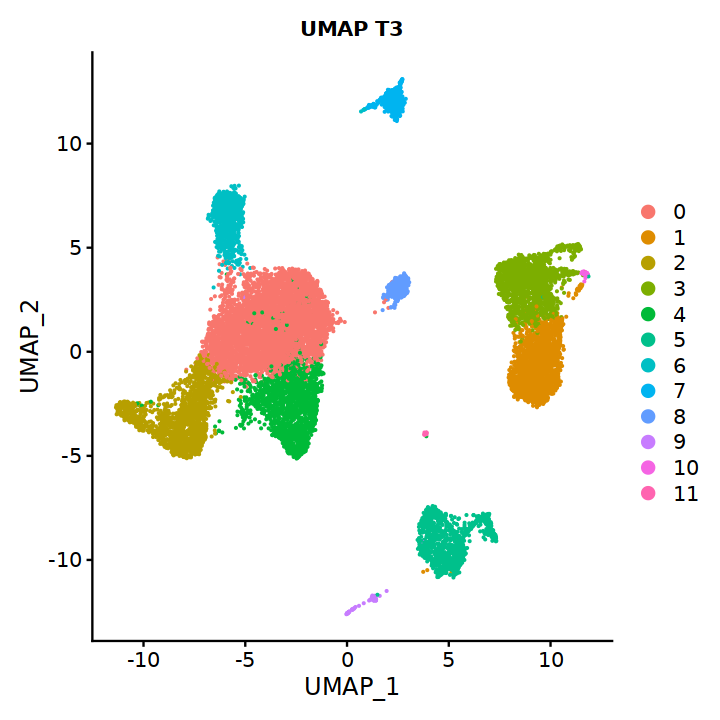

In [6]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1
) + ggtitle(glue('UMAP {timepoint}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

In [7]:
seurat_obj@meta.data <- seurat_obj@meta.data[, -which(names(seurat_obj@meta.data) == "RNA_snn_res.0.1")]
head(seurat_obj@meta.data)

orig.ident   nCount_RNA nFeature_RNA sample_org
T3_1_AAACCTGAGACCTTTG-1 SCGRES_83_84  2299      1350         OS0028_1  
T3_1_AAACCTGAGAGGTACC-1 SCGRES_83_84 14148      4032         OS0028_1  
T3_1_AAACCTGAGGATGCGT-1 SCGRES_83_84  2287      1287         OS0028_1  
T3_1_AAACCTGAGTGAAGTT-1 SCGRES_83_84  7222      2540         OS0028_1  
T3_1_AAACCTGAGTGTCTCA-1 SCGRES_83_84  2268      1357         OS0028_1  
T3_1_AAACCTGCACCGAATT-1 SCGRES_83_84  4120      1978         OS0028_1  
                        timepoint replicate sample_id pct_mt   percent.ribo
T3_1_AAACCTGAGACCTTTG-1 T3        1         T3_1      3.436277 15.311005   
T3_1_AAACCTGAGAGGTACC-1 T3        1         T3_1      2.982754 14.143342   
T3_1_AAACCTGAGGATGCGT-1 T3        1         T3_1      3.585483 17.796240   
T3_1_AAACCTGAGTGAAGTT-1 T3        1         T3_1      3.752423 10.924952   
T3_1_AAACCTGAGTGTCTCA-1 T3        1         T3_1      4.144621  8.553792   
T3_1_AAACCTGCACCGAATT-1 T3        1         T3_1      3.543689 12.014563   
                        doublet_score doublet_pred S.Score      G2M.Score  
T3_1_AAACCTGAGACCTTTG-1 0.026785714   FALSE         0.028790028 -0.09297793
T3_1_AAACCTGAGAGGTACC-1 0.069155844   FALSE        -0.044001337 -0.07994225
T3_1_AAACCTGAGGATGCGT-1 0.381171824    TRUE        -0.001458462  0.01760473
T3_1_AAACCTGAGTGAAGTT-1 0.022921109   FALSE        -0.015208375 -0.03410542
T3_1_AAACCTGAGTGTCTCA-1 0.003668977   FALSE         0.080892888 -0.01012551
T3_1_AAACCTGCACCGAATT-1 0.051654560   FALSE         0.104274495  0.01899396
                        Phase old.ident    seurat_clusters RNA_snn_res.0.2
T3_1_AAACCTGAGACCTTTG-1 S     SCGRES_83_84 3               3              
T3_1_AAACCTGAGAGGTACC-1 G1    SCGRES_83_84 4               4              
T3_1_AAACCTGAGGATGCGT-1 G2M   SCGRES_83_84 5               5              
T3_1_AAACCTGAGTGAAGTT-1 G1    SCGRES_83_84 0               0              
T3_1_AAACCTGAGTGTCTCA-1 S     SCGRES_83_84 2               2              
T3_1_AAACCTGCACCGAATT-1 S     SCGRES_83_84 3               3

### Check general cell types

Plot specific markers to annotate main cell types

#### T-cells

In [8]:
markers = c("CD3E", "CD3G","CD4","CD8A", "CD8B","ANXA1","GZMK","FOXP3")

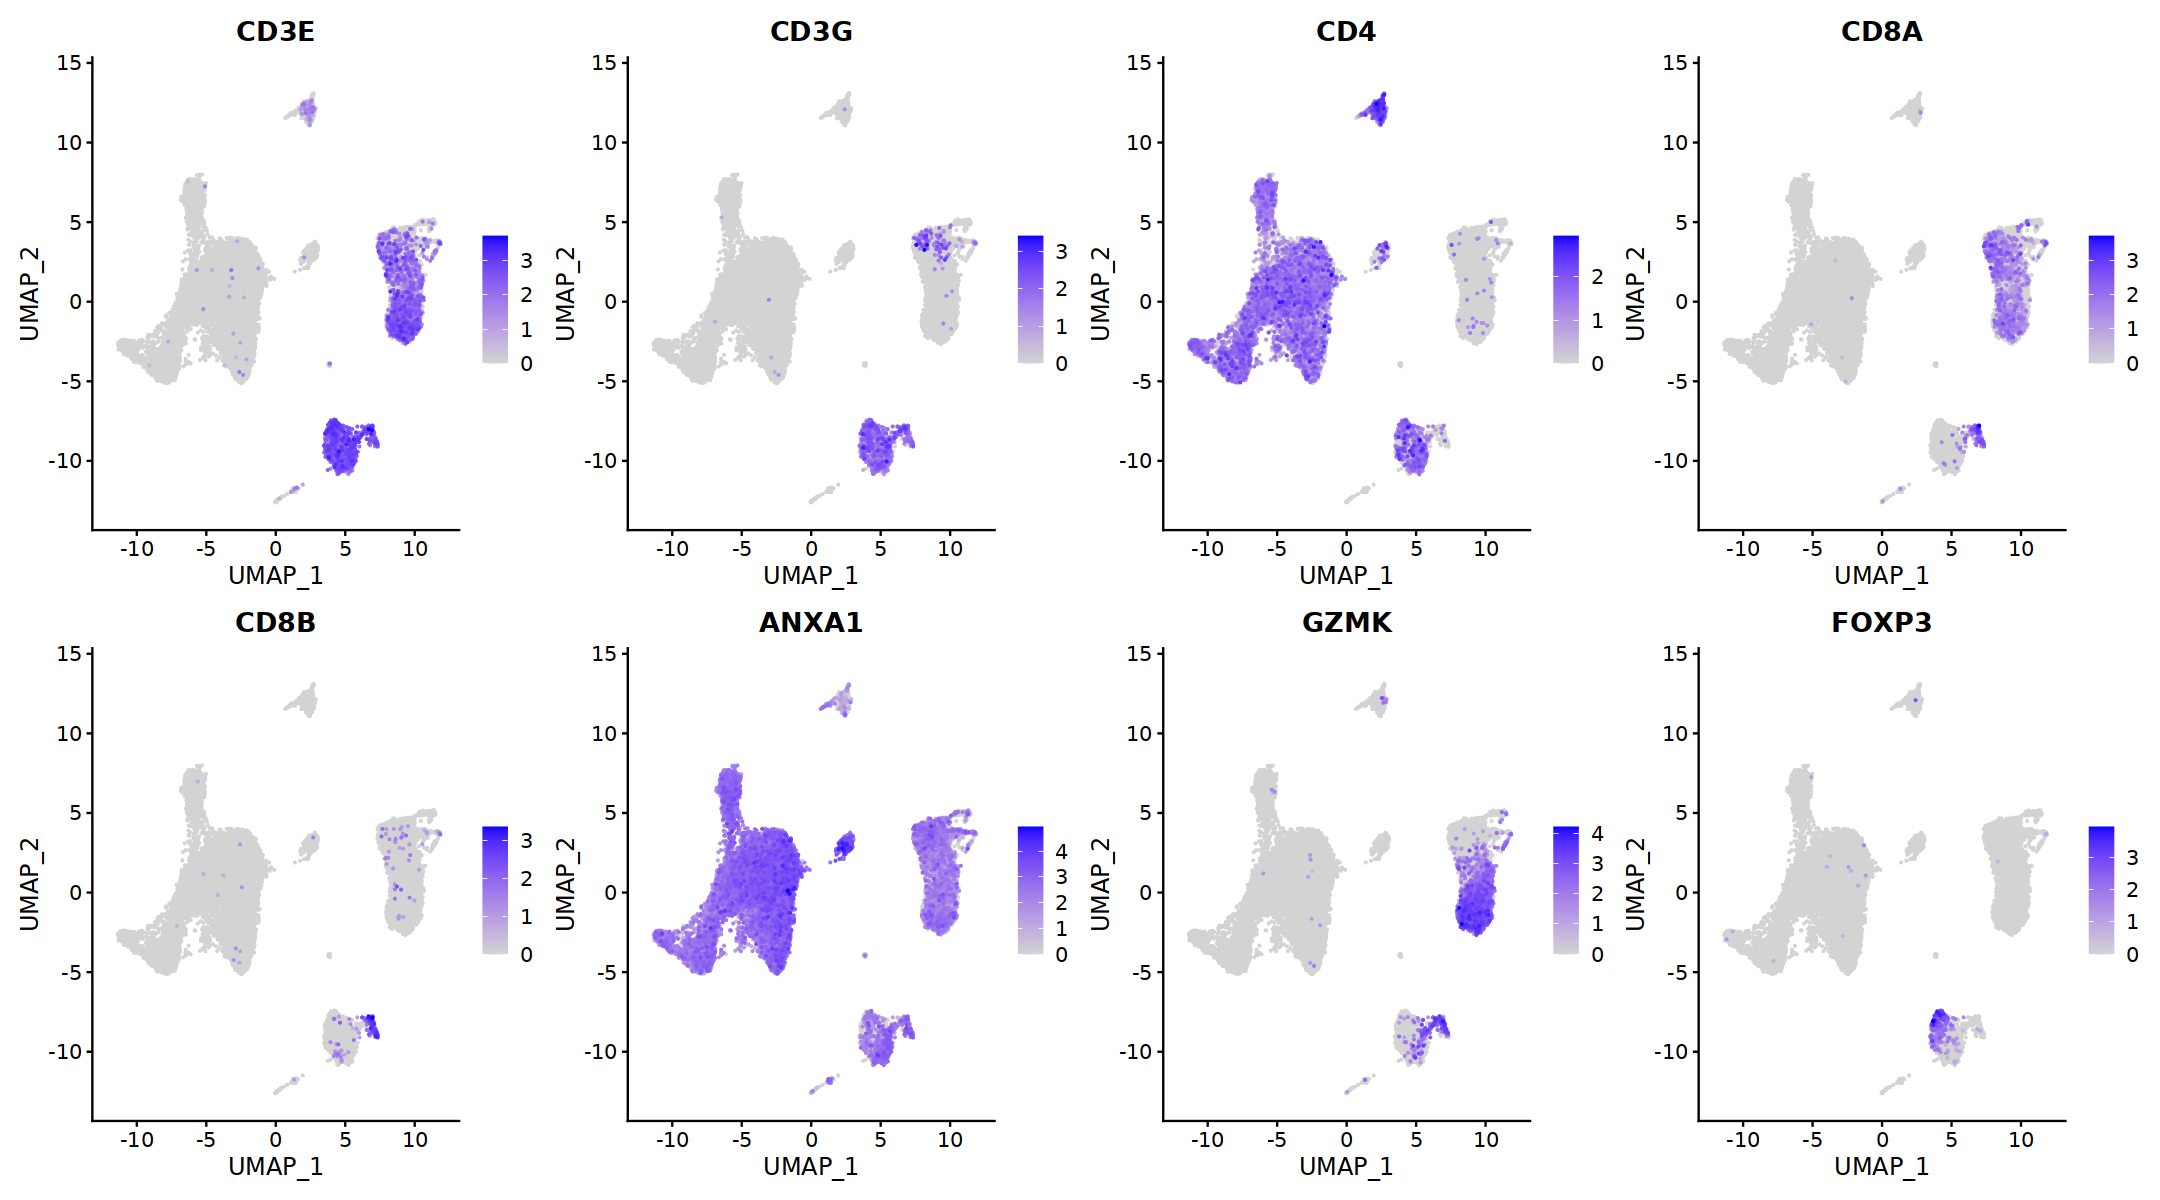

In [9]:
options(repr.plot.width = 18, repr.plot.height = 10, warn=-1,verbose = FALSE)
FeaturePlot(seurat_obj, reduction = "umap", 
            features=markers, 
            order = TRUE, ncol=4)

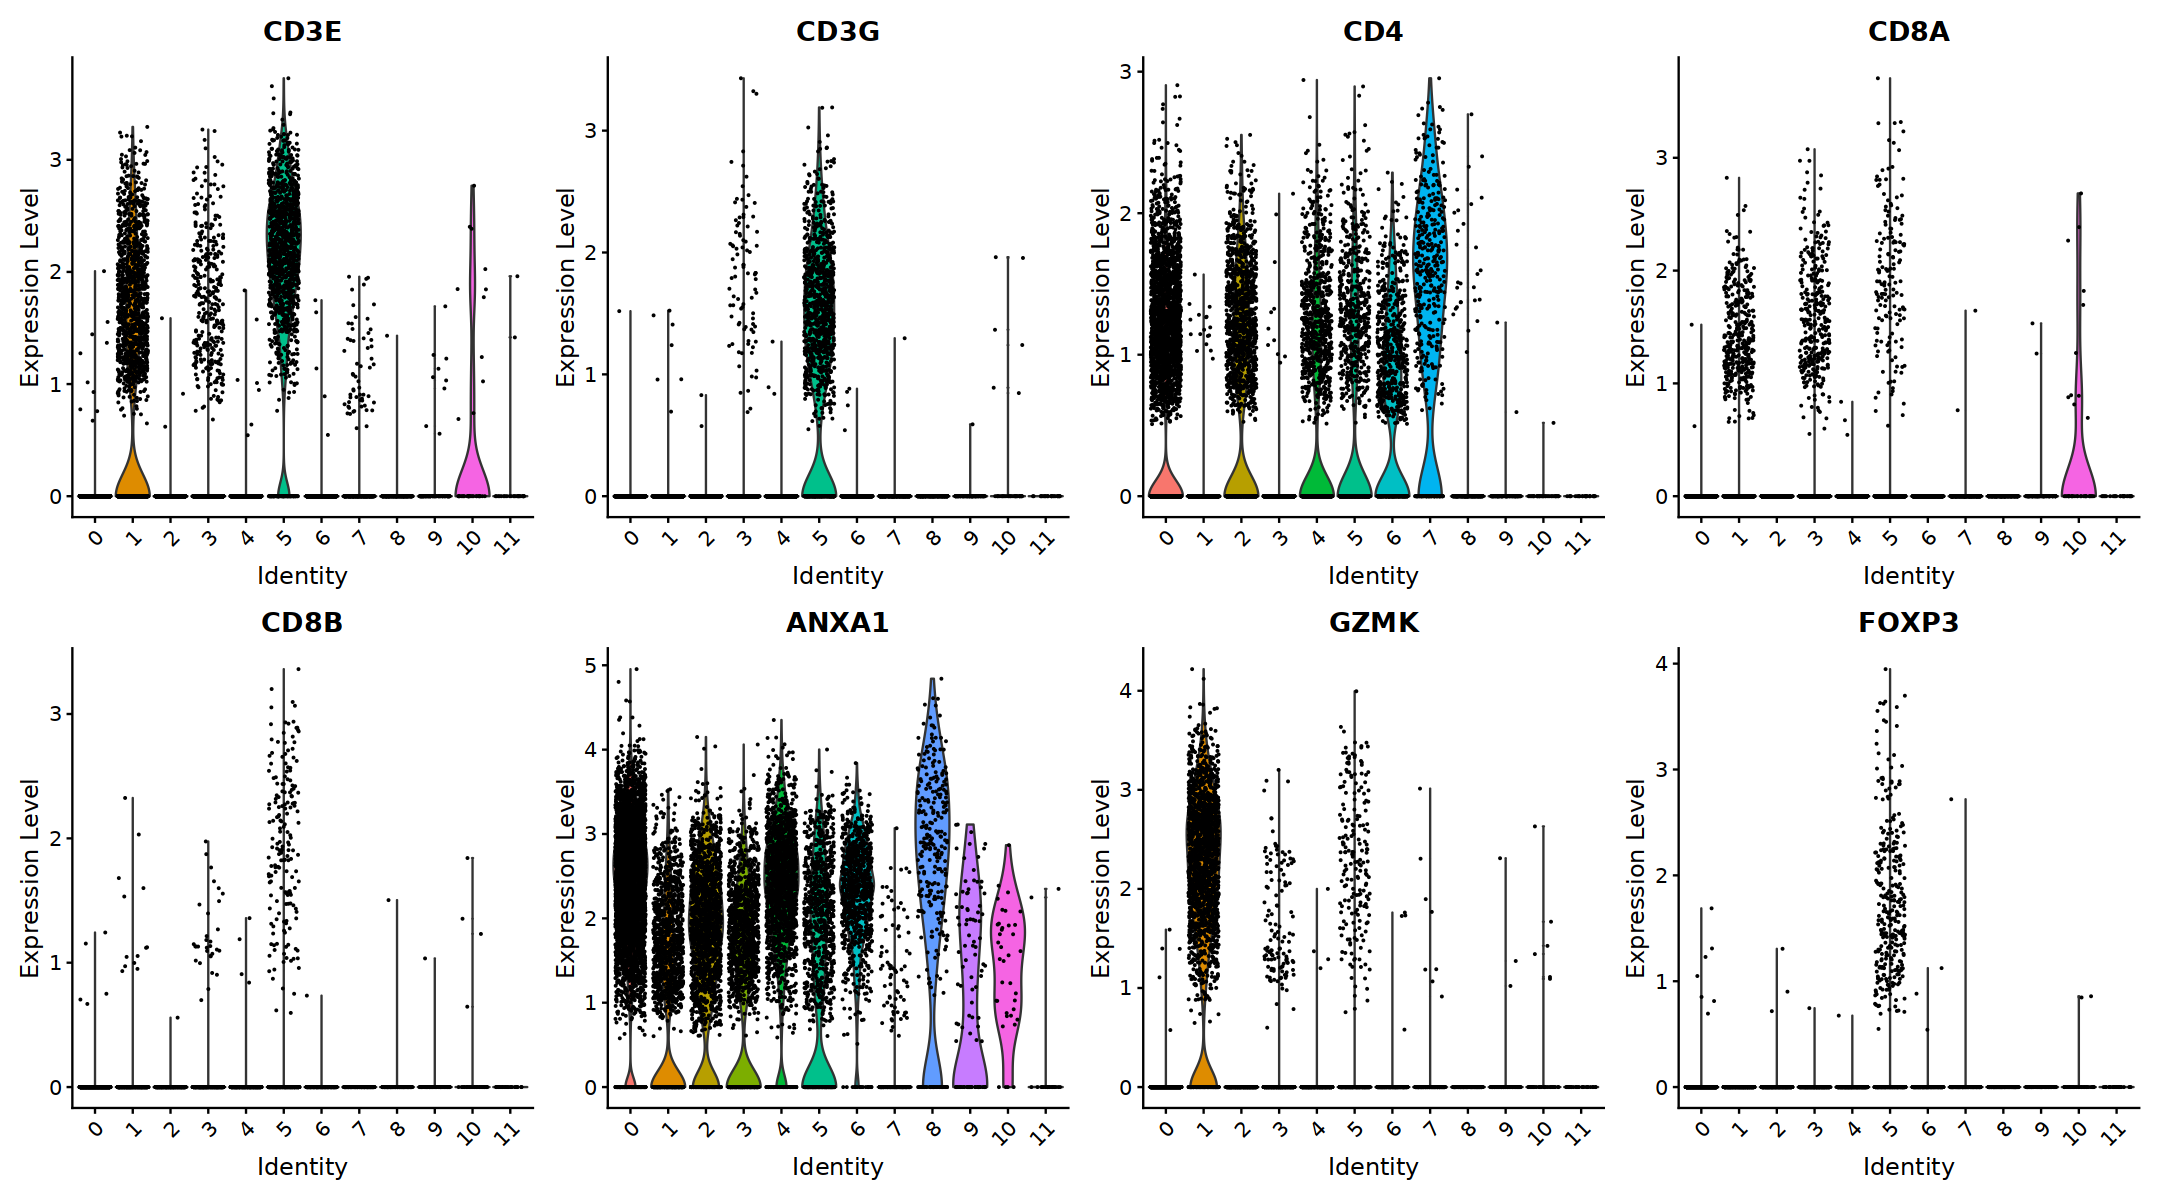

In [10]:
options(repr.plot.width = 18, repr.plot.height = 10, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, 
            features=markers, 
            ncol=4)

#### Natural Killers

In [11]:
markers = c("NCAM1", "FCGR3A","B3GAT1","CX3CR1", "GNLY", 
            "KLRC2", "KLRD1", "KLRF1", "KLRK1", "KLRC1", "GNLY", "NKG7")

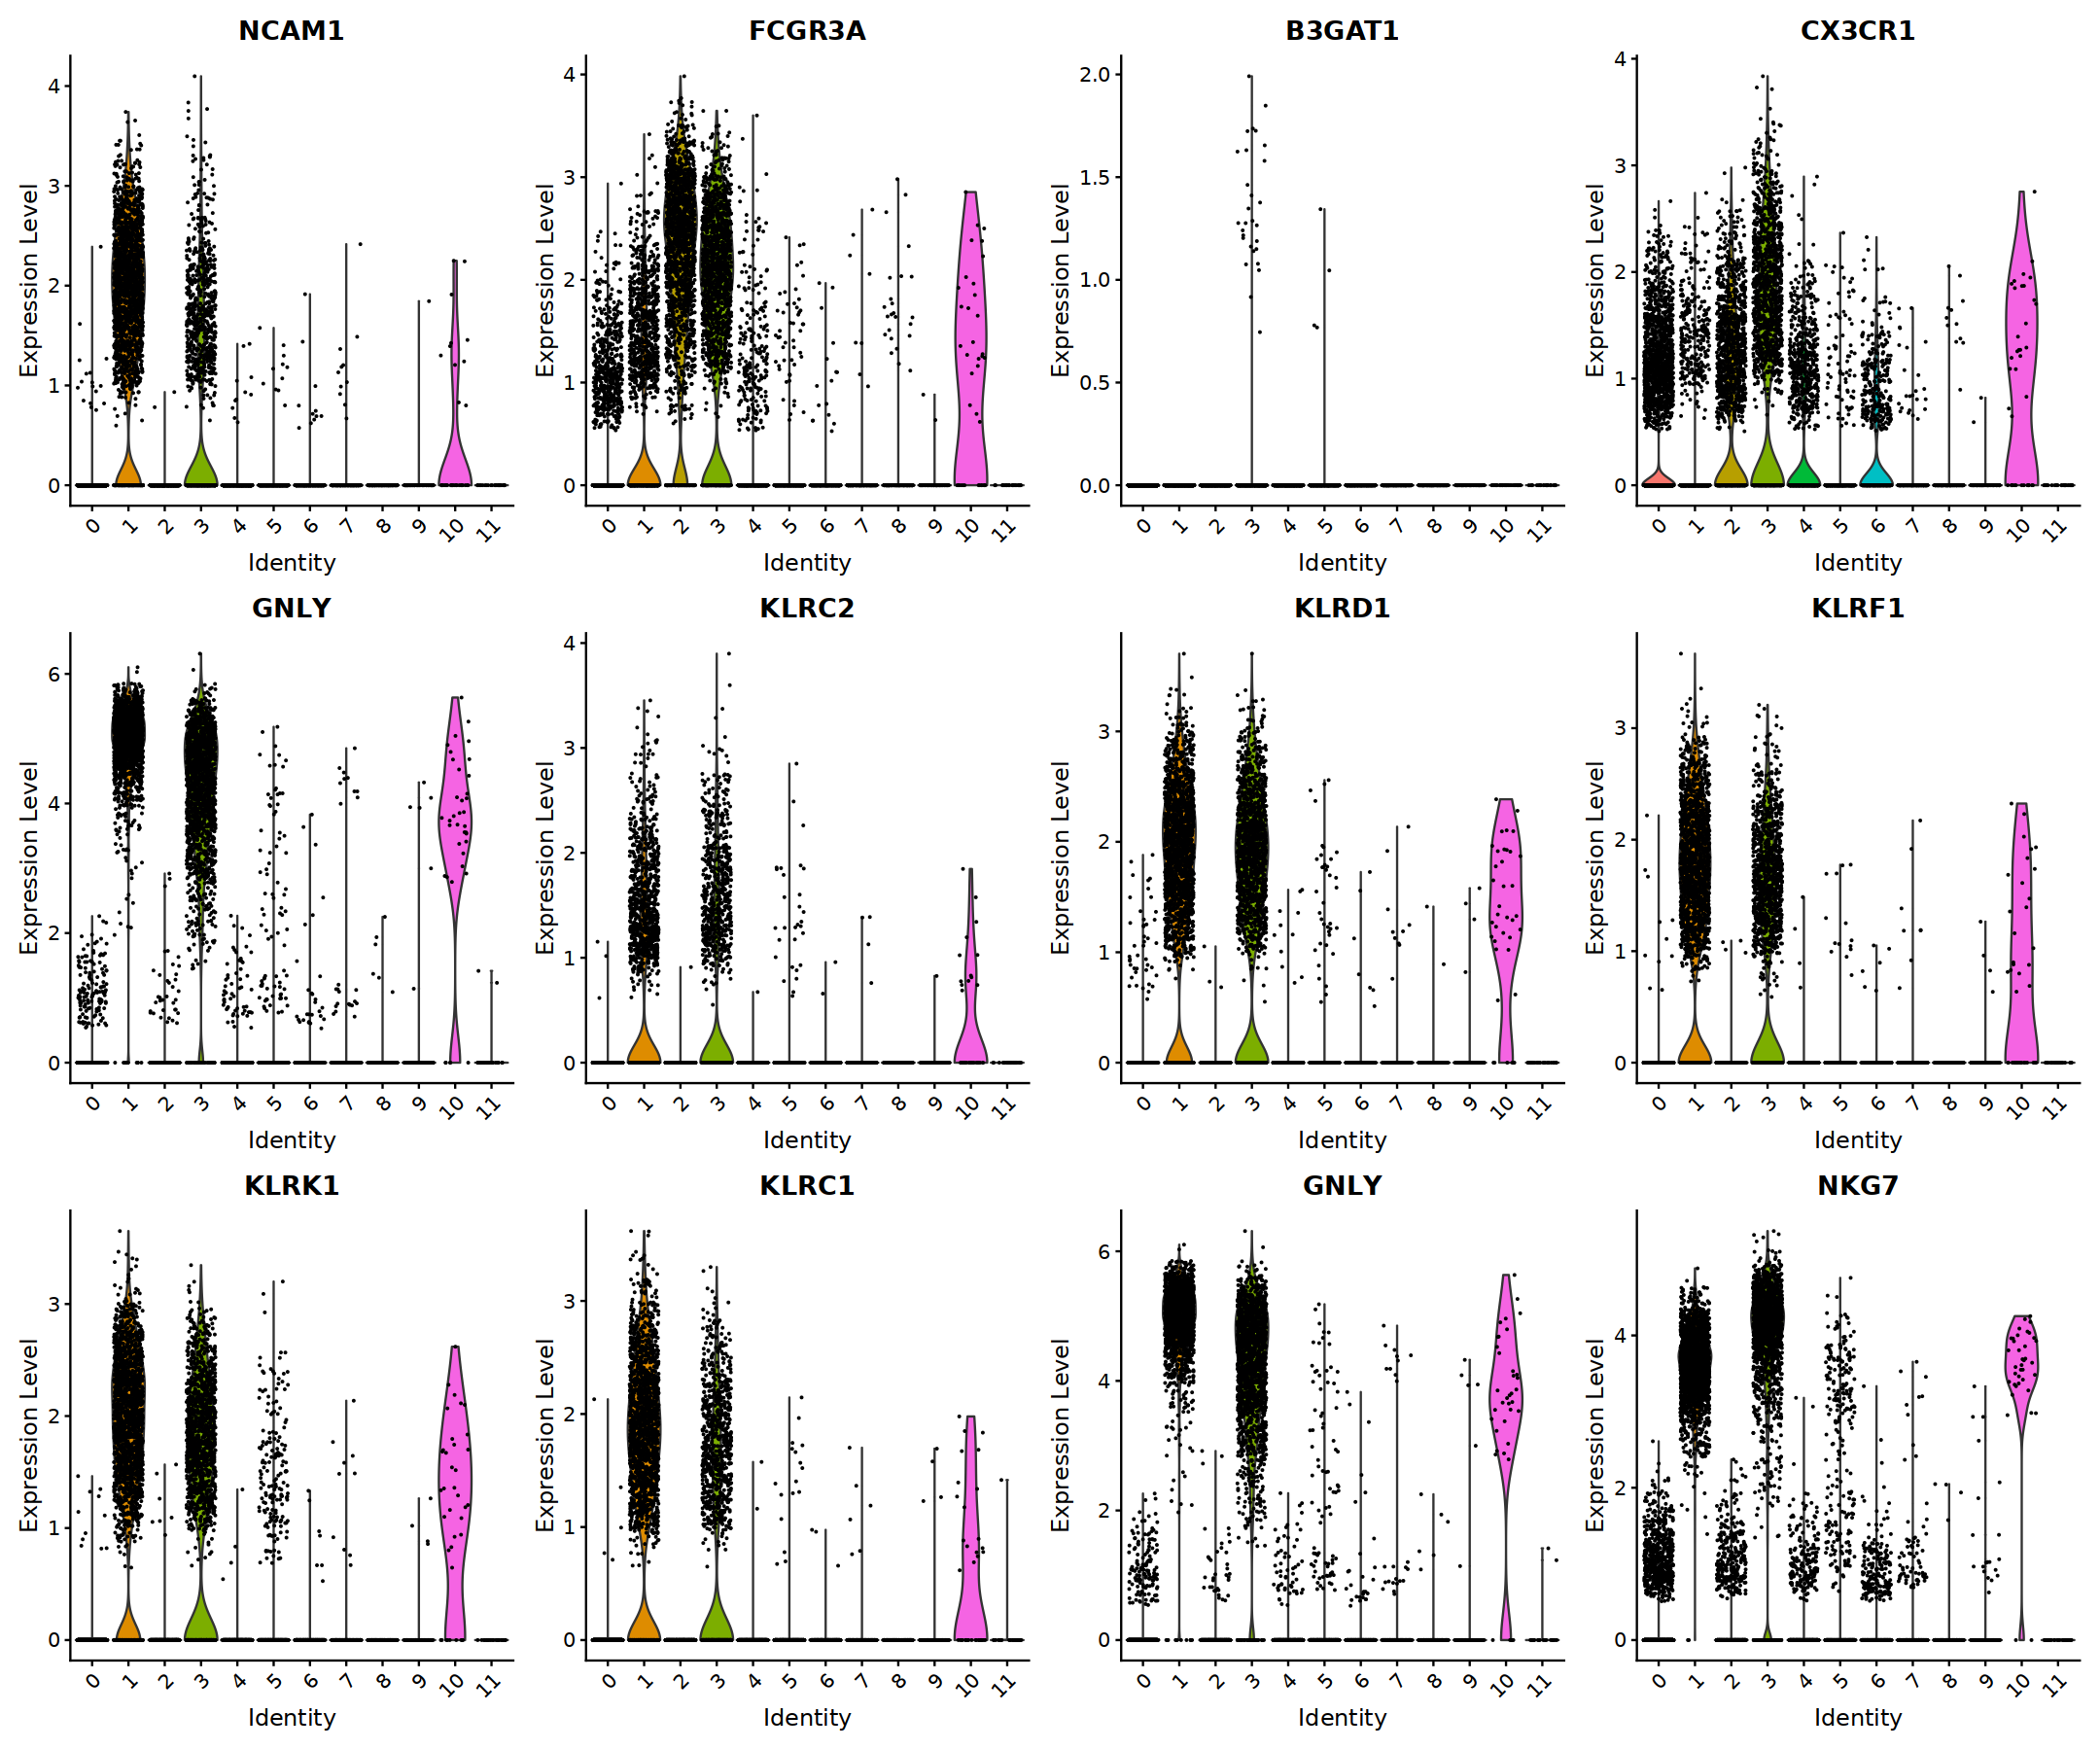

In [12]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, 
            features=markers, 
            ncol=4)

#### B-cells

In [13]:
markers = c("CD19","MS4A1","CCR7", "SELL","ITGAX", "CD79A","CD79B","JCHAIN","IGHA1")

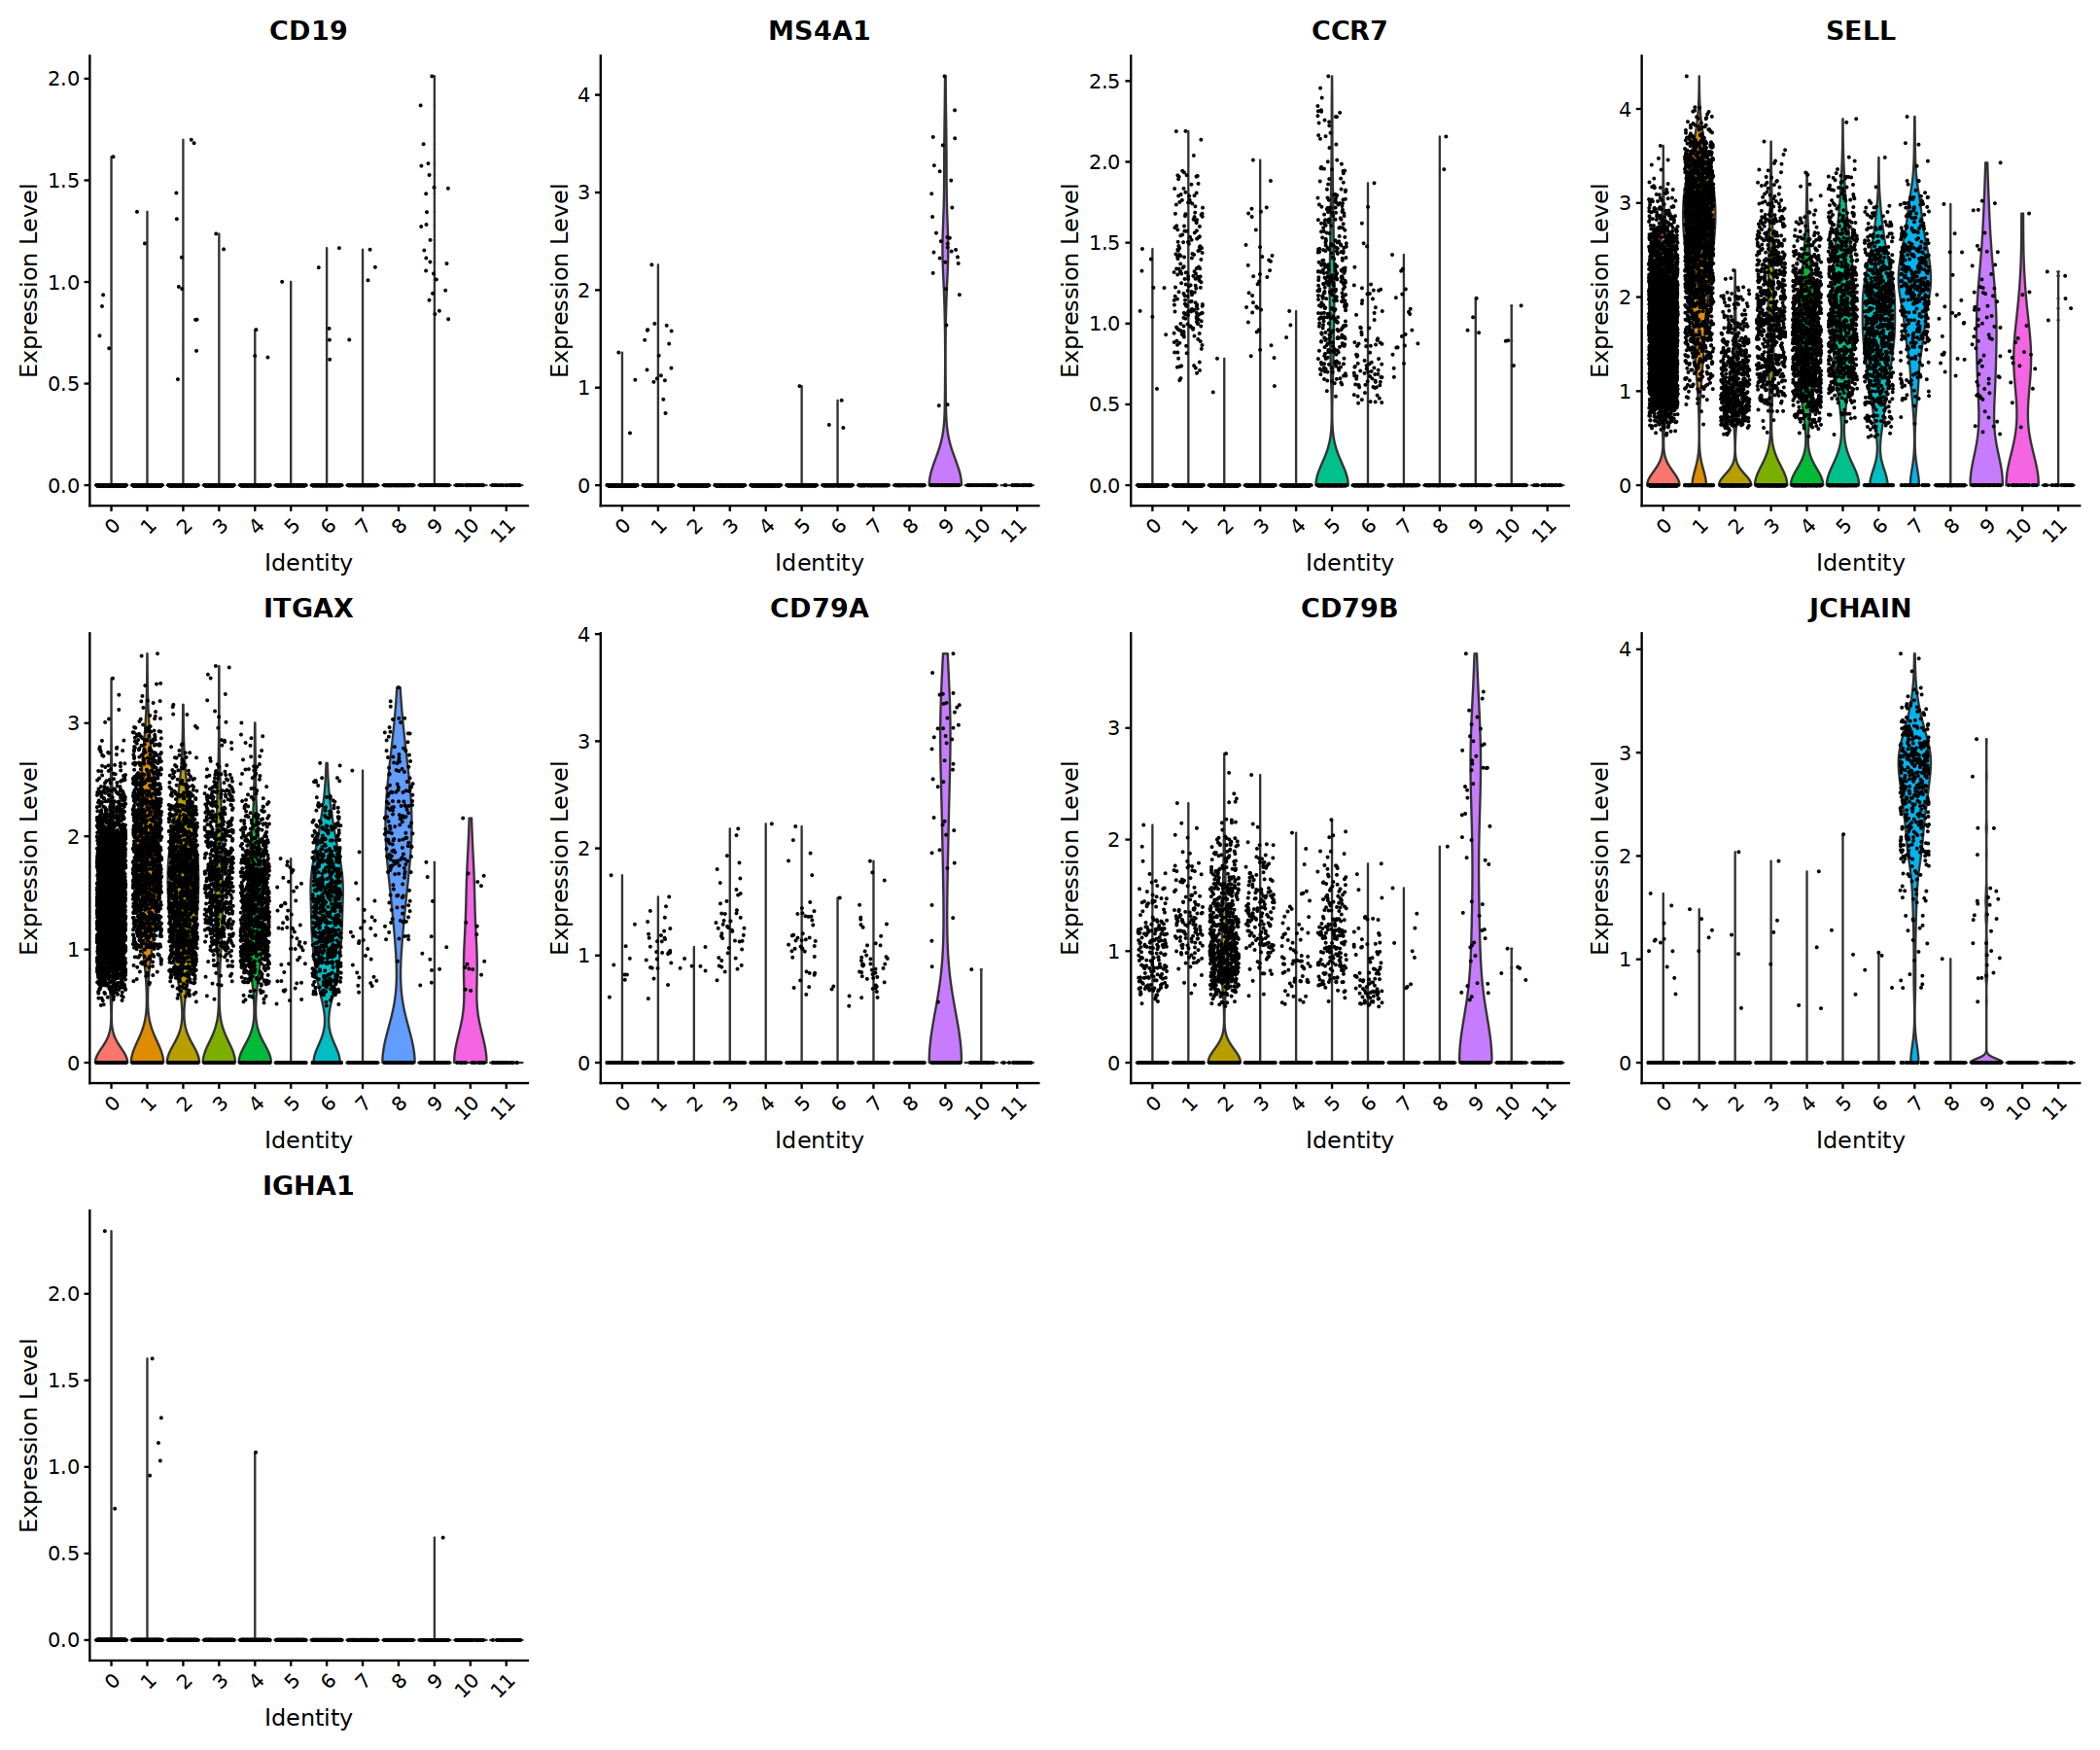

In [14]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, 
            features=markers, 
            ncol=4)

#### Monocytes 

In [15]:
markers = c("CD14", "S100A8", "S100A9", "LYZ", "VCAN", "FCN1","FCGR3A", "CX3CR1", "HLA-DRB1", "HLA-DRA")

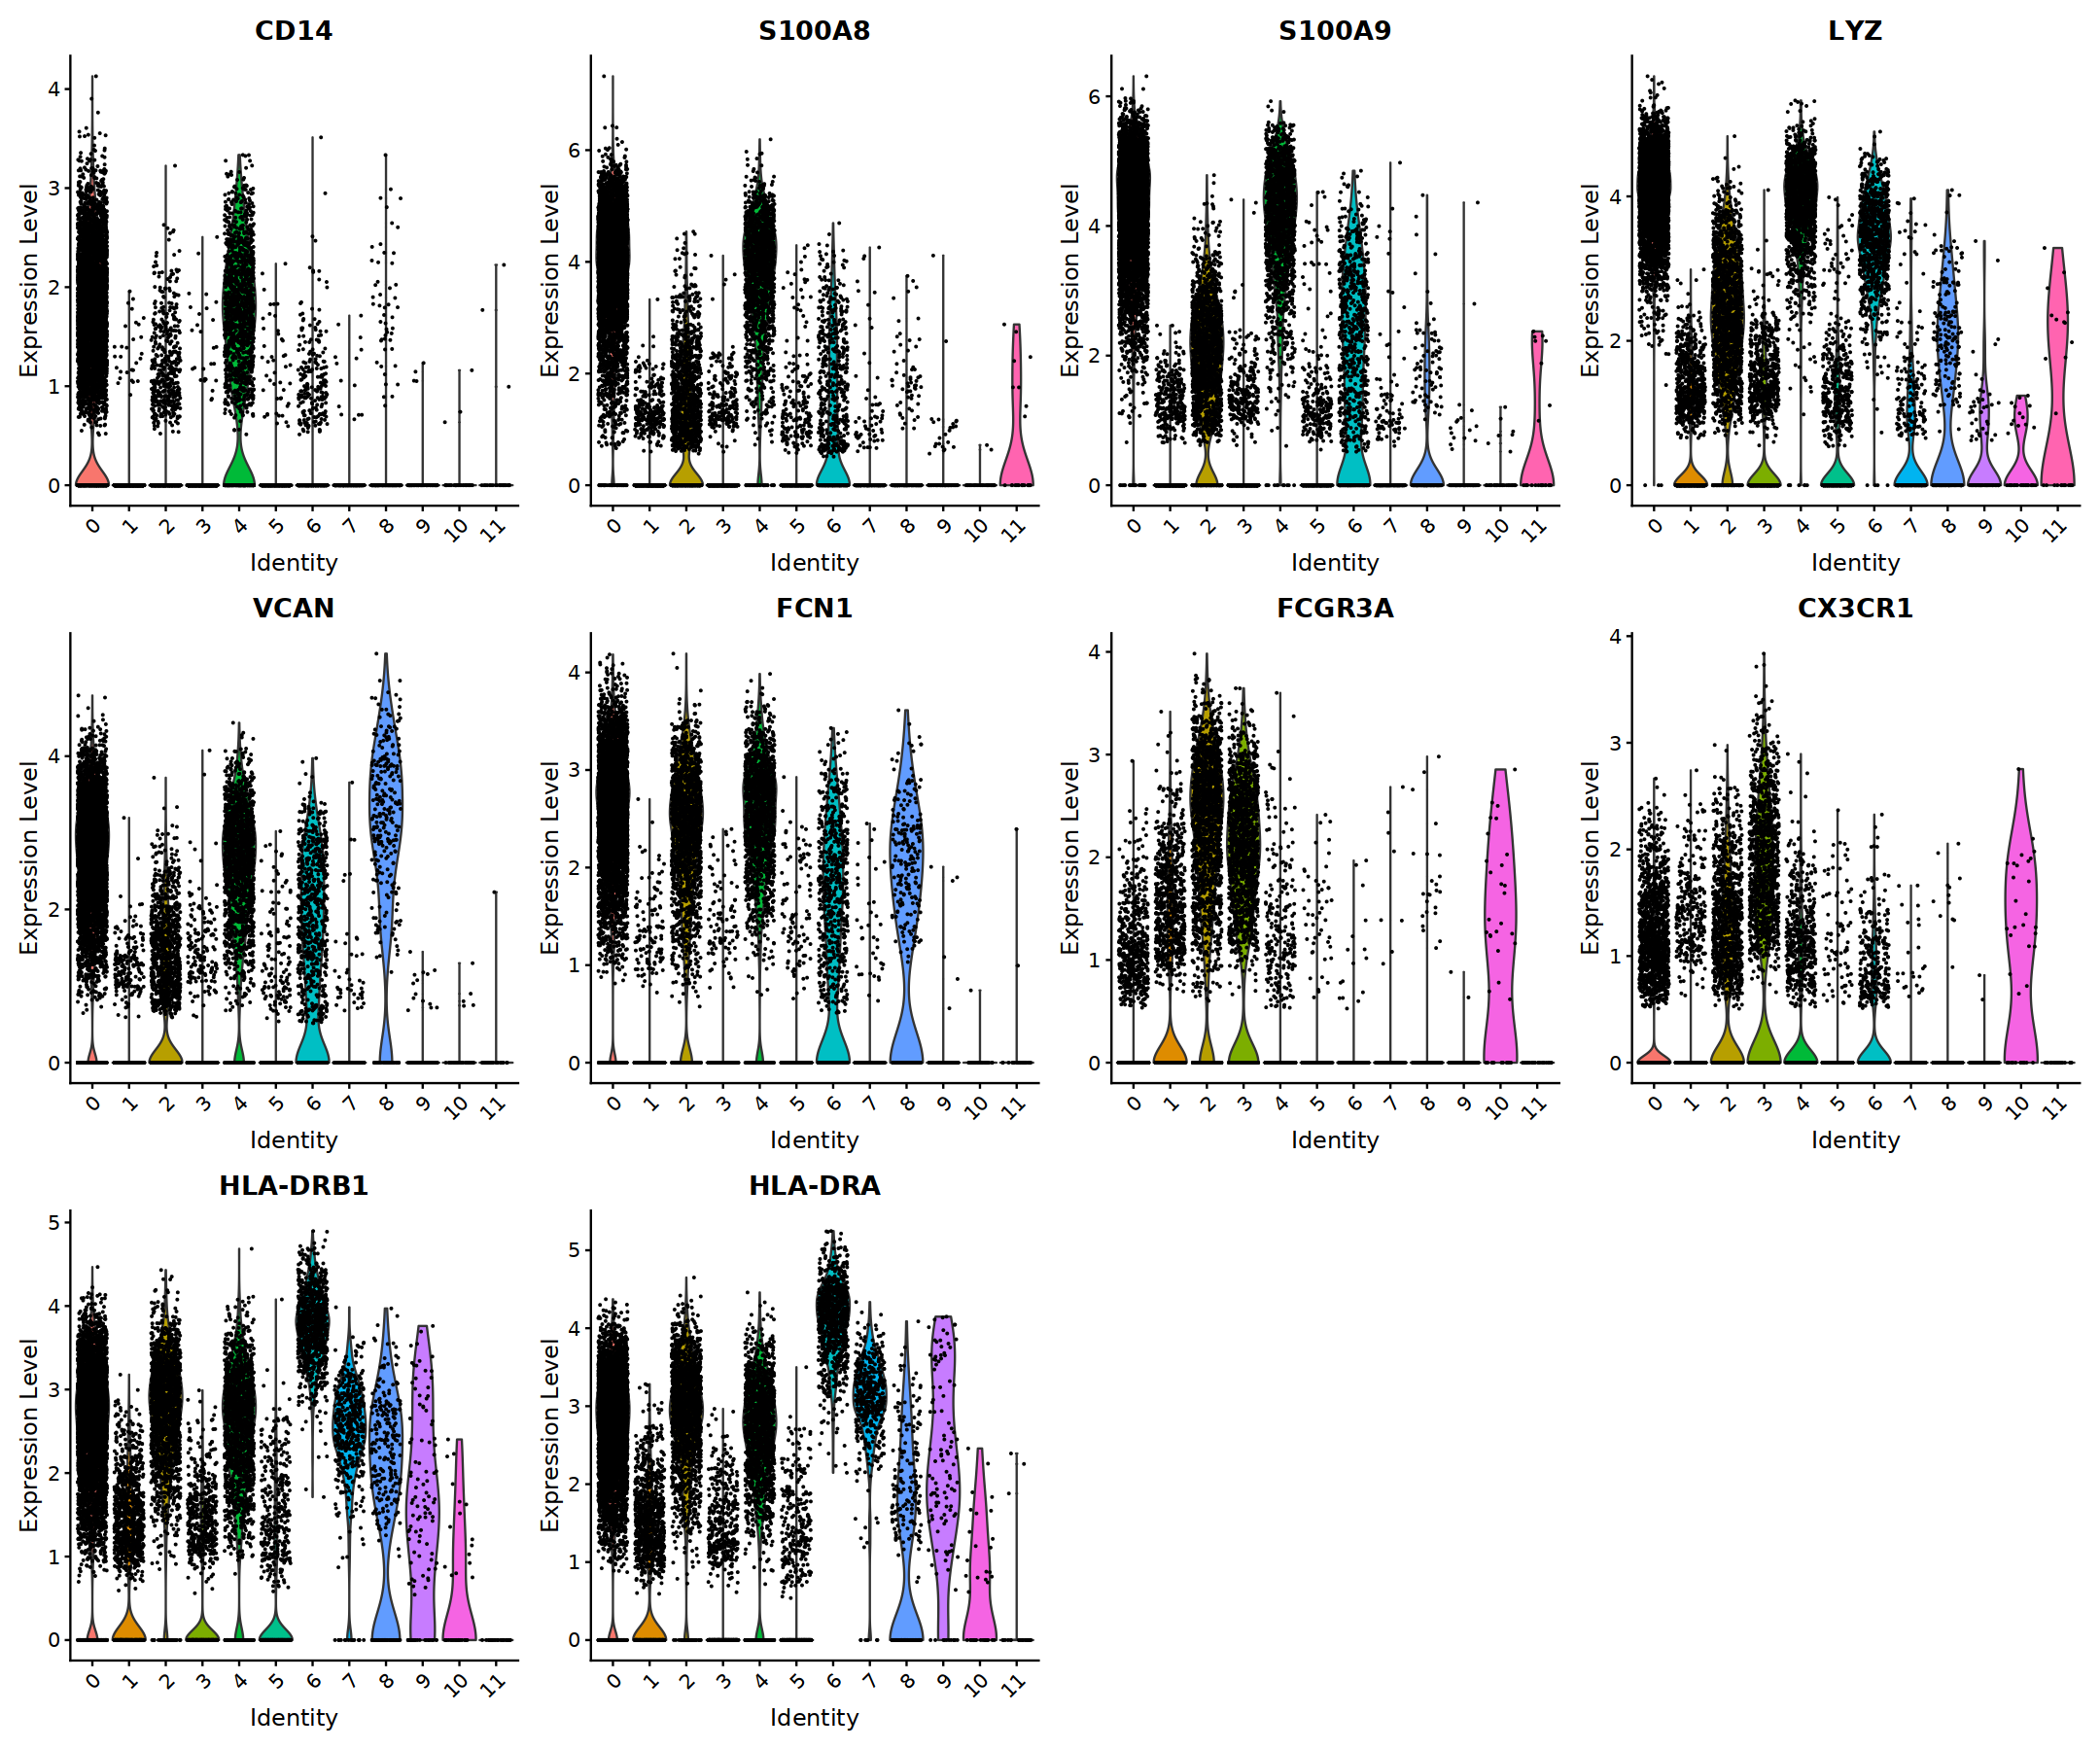

In [16]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, 
            features=markers, 
            ncol=4)

#### Dendritic cells

In [17]:
markers = c("CLEC9A", "XCR1", "IDO1","FCER1A", "CLEC10A","ITGAX","SIGLEC6","IL3RA","JCHAIN")

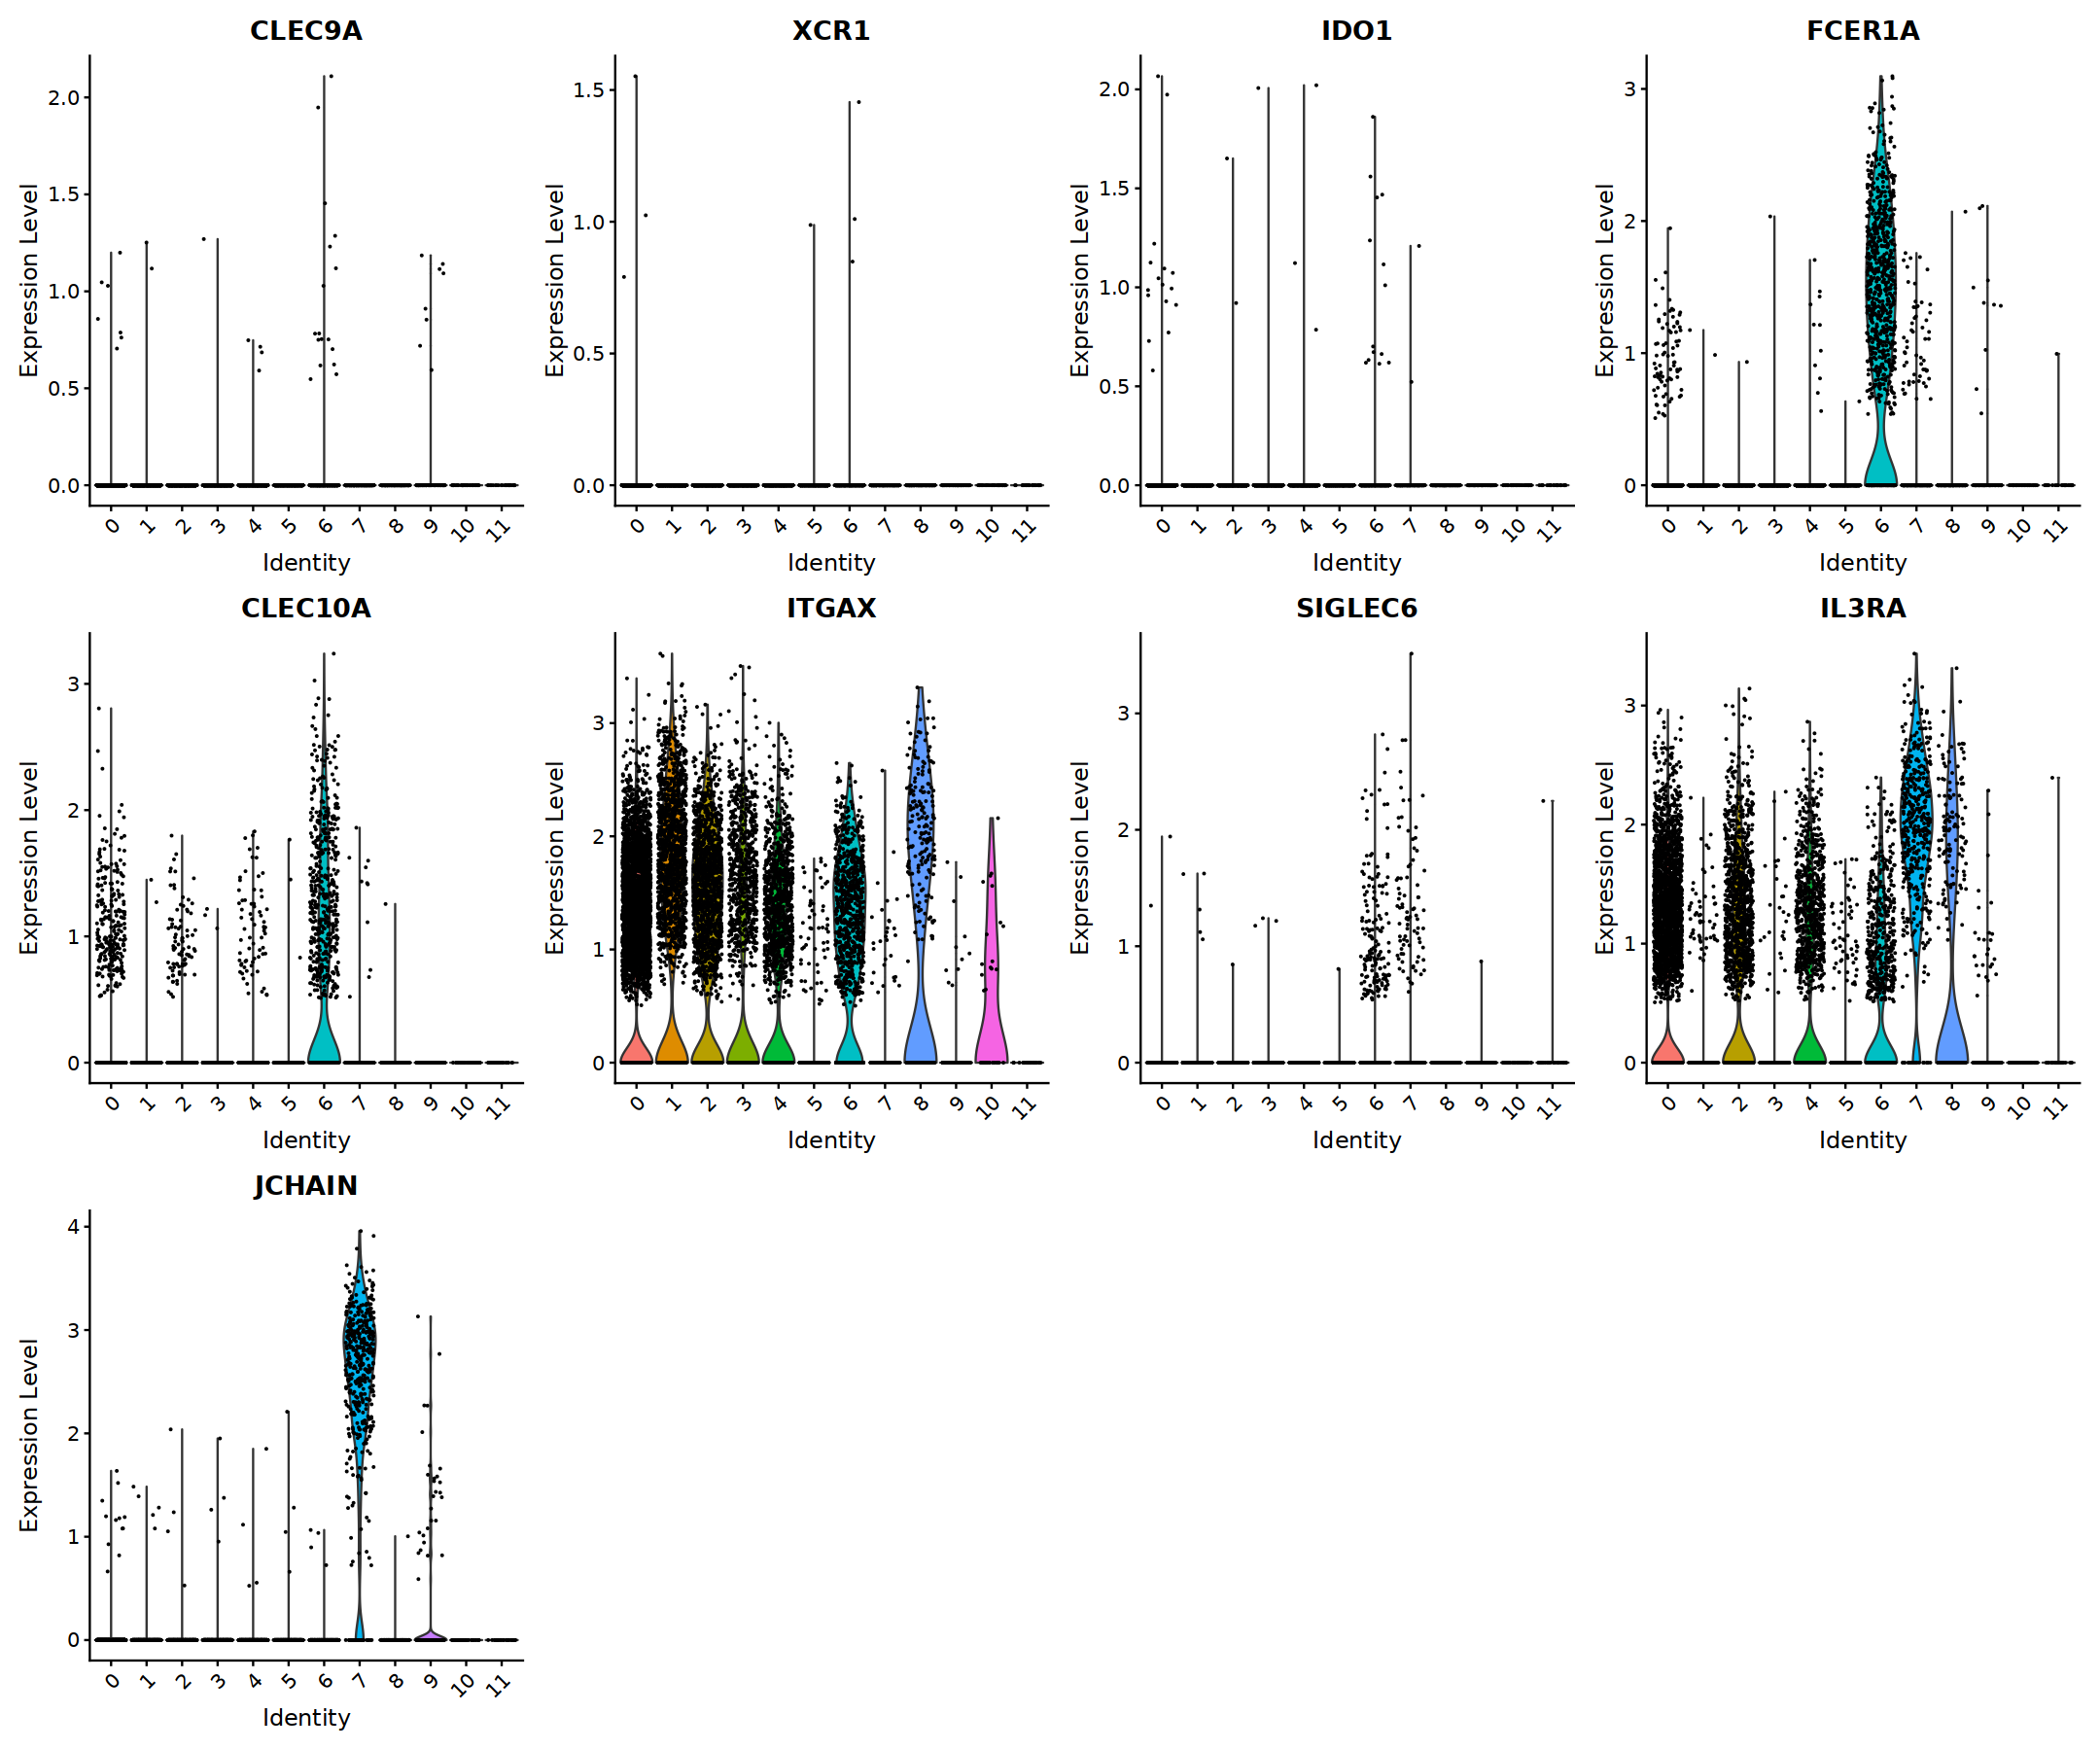

In [18]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, 
            features=markers, 
            ncol=4)

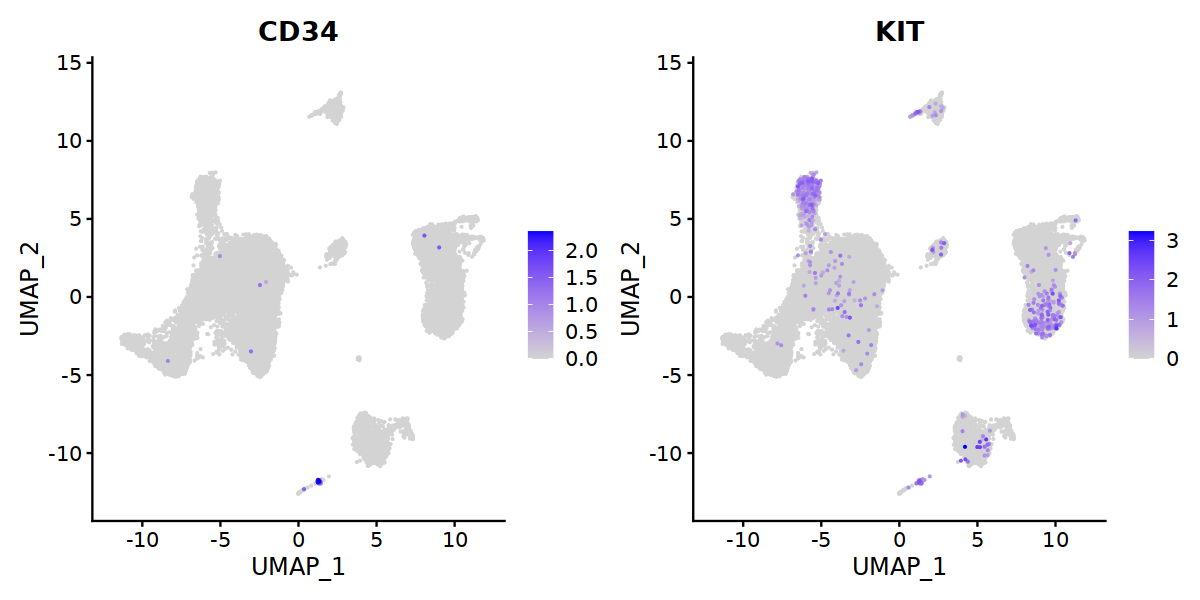

In [19]:
options(repr.plot.width = 10, repr.plot.height = 5, warn=-1,verbose = FALSE)
FeaturePlot(seurat_obj, reduction = "umap", 
            features=c("CD34", "KIT"), 
            order = TRUE, ncol=2)

In [20]:
c <- 11
rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  dplyr::filter(p_val_adj < 0.05) %>% 
  arrange(desc(avg_log2FC)) %>% head(n=20)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene     
1   2.933178e-32 6.842640   1.000 0.206  8.002883e-28 11      PPBP     
2   2.220743e-50 6.015083   1.000 0.112  6.059074e-46 11      TUBB1    
3   4.356413e-84 5.544219   1.000 0.047  1.188604e-79 11      GP9      
4   2.417444e-52 5.535561   1.000 0.111  6.595753e-48 11      GNG11    
5   4.601380e-53 5.440438   1.000 0.112  1.255440e-48 11      CAVIN2   
6   1.132945e-40 5.380531   1.000 0.152  3.091128e-36 11      PF4      
7   7.240759e-36 5.286255   0.962 0.162  1.975569e-31 11      HIST1H2AC
8   4.092041e-64 5.197494   1.000 0.078  1.116472e-59 11      ACRBP    
9   7.080249e-70 5.191483   1.000 0.055  1.931775e-65 11      MPIG6B   
10  3.980247e-39 5.041226   0.769 0.092  1.085970e-34 11      TSC22D1  
11  1.114839e-34 4.915621   0.962 0.180  3.041728e-30 11      RGS18    
12  1.061126e-54 4.886267   0.885 0.070  2.895177e-50 11      CLU      
13  9.974786e-30 4.832697   1.000 0.230  2.721521e-25 11      TUBA4A   
14  5.382963e-31 4.759361   1.000 0.236  1.468688e-26 11      NRGN     
15  5.927155e-59 4.739846   0.923 0.080  1.617165e-54 11      SPARC    
16 1.033732e-114 4.724904   0.846 0.022 2.820436e-110 11      TMEM40   
17  1.175069e-68 4.675808   0.885 0.042  3.206059e-64 11      PTCRA    
18 1.692919e-100 4.669845   0.923 0.034  4.618959e-96 11      ITGB3    
19  1.806728e-71 4.587246   0.885 0.045  4.929476e-67 11      ITGA2B   
20  4.285571e-32 4.586180   1.000 0.205  1.169275e-27 11      F13A1

## Renaming

In [21]:
rename_clusters= list("0"="Monocytes",
                      "1"="NK CD56+",
                      "2"="Monocytes non-classical", 
                      "3"="NK CD16+", 
                      "4"="Monocytes/Platelets",
                      "5"="T-cells",
                      "6"="Dendritic cells",
                      "7"="Mast cells", 
                      "8"="Monocytes",
                      "9"="B-cells",
                      "10"="Proliferative cells",
                      "11"="Platelets")
seurat_obj <- RenameIdents(object = seurat_obj, rename_clusters)
seurat_obj$l1_annot <- Idents(seurat_obj)

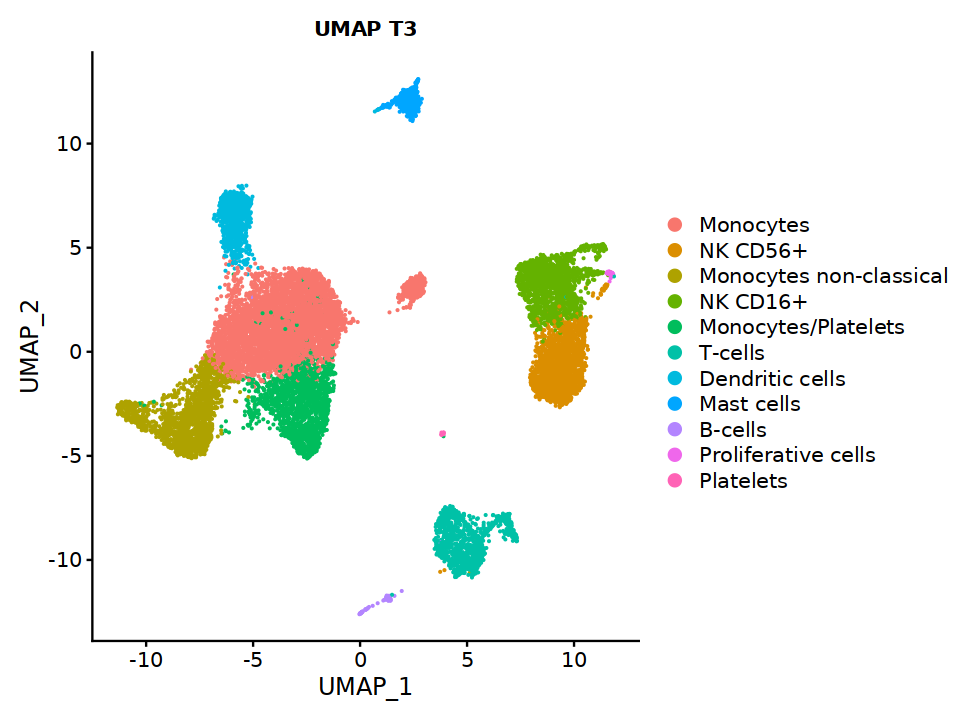

In [22]:
options(repr.plot.width = 8, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1
) + ggtitle(glue('UMAP {timepoint}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

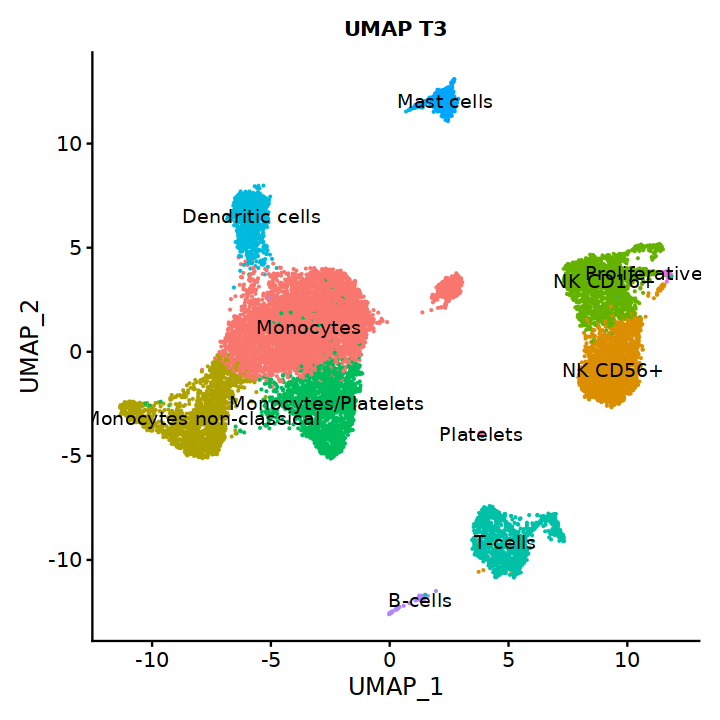

In [23]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1,
  label = T
) + NoLegend() + ggtitle(glue('UMAP {timepoint}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

## Save

In [24]:
saveRDS(seurat_obj, here::here(glue::glue("{annot}/{robj_dir}/4.0-l1_all_{timepoint}.rds")))

## Session Info

In [25]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/groups/singlecell/isentis/conda_envs/ines_r4.1.1c/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.3    forcats_1.0.0      stringr_1.5.0      dplyr_1.1.3       
 [5] purrr_1.0.2        readr_2.1.4        tidyr_1.3.0        tibble_3.2.1      
 [9] ggplot2_3.4.4      tidyverse_2.0.0    glue_1.6.2         here_1.0.1        
[13] SeuratObject_4.1.4 Seurat_4.0.5  